In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
# path = r"C:\Users\anees\Documents\CS\MP\datasets\2000c_200sub.csv"
path = r"C:\Users\anees\Documents\CS\MP\datasets\toxic200.csv" 

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,subreddit,user,comment,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,funny,papa_mike2,At least check the mail while you’re down ther...,10749.0,0.157311,0.009696,0.047384,0.004702,0.063968,0.010792
1,funny,notagoodboye,He missed cracking his head open on that littl...,14585.0,0.261358,0.012234,0.101802,0.004397,0.111198,0.010935
2,funny,Rati0h,I’ve never seen shoes leave a mans body as vio...,7169.0,0.162274,0.008894,0.063053,0.003678,0.060360,0.008355
3,funny,whezel,“I didn’t fuckin do it on purpose” is the best...,16282.0,0.231648,0.026019,0.244111,0.004844,0.099483,0.015420
4,funny,MB8189,"The audio is perfect, “didn’t fucking do it on...",2380.0,0.754907,0.050535,0.737739,0.007555,0.284087,0.023018


In [6]:
df.shape

(390586, 10)

In [7]:
classifiers = []

In [8]:
from sklearn.externals import joblib

In [9]:
for i in range(6):
    classifiers.append(joblib.load("lr_char_" + str(i) + ".joblib"))

In [9]:
# train = pd.read_csv('C:/Users/anees/Documents/CS/MP/datasets/toxic comment classification/train.csv')
# test = pd.read_csv('C:/Users/anees/Documents/CS/MP/datasets/toxic comment classification/test.csv')
# all_text = pd.concat([train.comment_text, test.comment_text])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [11]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

In [16]:
import pickle
read_flag = 1

if read_flag!= 1:
    print("Fitting now.\n Fitting word vectorizer")
    word_vectorizer.fit(all_text)
    print("Fitting char vectorizer")
    char_vectorizer.fit(all_text)
    print("Dumping into pickle files")
    pickle.dump(word_vectorizer, open("word_vectorizer.pickle", "wb"))
    pickle.dump(char_vectorizer, open("char_vectorizer.pickle", "wb"))
else:
    print("reading from dump files")
    word_vectorizer = pickle.load(open("word_vectorizer.pickle",'rb'))
    char_vectorizer = pickle.load(open("char_vectorizer.pickle",'rb'))

reading from dump files


In [7]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [18]:
df['toxic'] = 0
df['severe_toxic'] = 0
df['obscene'] = 0
df['threat'] = 0
df['insult'] = 0
df['identity_hate'] = 0

In [37]:
df = df.dropna()

In [39]:
subs = df.subreddit.unique()
count = 0
for sub in subs:
    if count%10==0:
        print(count)
    wordfeat = word_vectorizer.transform(df[df.subreddit==sub].comment)
    charfeat = char_vectorizer.transform(df[df.subreddit==sub].comment)
    feat = hstack([charfeat, wordfeat])
    i = 0
    for class_name in class_names:
        df[class_name][df.subreddit==sub] = classifiers[i].predict_proba(feat)[:,1]
        i+=1
    count+=1

0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [8]:
df.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,390586.000000,390586.000000,390586.000000,390586.000000,390586.000000,390586.000000,390586.000000
mean,81.013418,0.125756,0.009367,0.064549,0.003518,0.050982,0.009867
std,736.857267,0.156182,0.024595,0.130917,0.003763,0.082617,0.011639
min,-1204.000000,0.002332,0.000868,0.002535,0.000851,0.002098,0.001703
25%,1.000000,0.050795,0.004893,0.023822,0.002601,0.022348,0.006725
50%,4.000000,0.076973,0.006297,0.032371,0.003059,0.031116,0.008339
75%,16.000000,0.124978,0.008201,0.046723,0.003630,0.046098,0.010387
max,84143.000000,0.999986,0.885255,0.999992,0.340690,0.999421,0.815637


In [9]:
subs = df.subreddit.unique()
toxic_scores = []
count = 0
for sub in subs:
    score = []
    for c in class_names:
        x = df[df.subreddit==sub]
        score.append(x[c].sum()/x.shape[0])
    y = [sub]
    y.extend(score)
    toxic_scores.append(y)
    count+=1
    if(count%10==0):
        print(count)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [10]:
tox = toxic_scores.copy()

In [11]:
for i in range(len(subs)):
    print(toxic_scores[i])

['funny', 0.15726447260988669, 0.01112852429992756, 0.08434074749886589, 0.003960445511792105, 0.06251508234887079, 0.010935372874579885]
['AskReddit', 0.1390330548448545, 0.011053767359802052, 0.07470921132816165, 0.003550941488478313, 0.057424735035056546, 0.011067225507320201]
['todayilearned', 0.11726160628109264, 0.009125831103133634, 0.0620698203743362, 0.003303336468215461, 0.04857310349621355, 0.009290463886008094]
['worldnews', 0.12910326226273716, 0.008820921664722288, 0.06685903103119278, 0.0033920326073615665, 0.05087328972061211, 0.009377445281300075]
['science', 0.06862462954168638, 0.004856903967777706, 0.02670903215058253, 0.0026749940408862115, 0.028196272238933062, 0.007264959479357742]
['pics', 0.1160056212693465, 0.00959878264663817, 0.06103478748143181, 0.0036277093008128913, 0.04795414774404982, 0.009616126945682386]
['gaming', 0.13179361552355662, 0.009296401952485918, 0.06821677782682092, 0.0037176941552168213, 0.05096109827808111, 0.00971522770536673]
['IAmA', 

In [12]:
def sorts(arr, pos):
    for i in range(len(arr)-1):
        for j in range(len(arr) - i-1):
            if arr[j][pos+1]<arr[j+1][pos+1]:
                temp = arr[j]
                arr[j] = arr[j+1]
                arr[j+1] = temp

In [13]:
top_toxic = []
for i in range(len(class_names)):
    y = list(tox)
    sorts(y,i)
    top_toxic.append(y)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def plot_bar_x(i):
    f, ax = plt.subplots(figsize=(30,5)) 
    index = np.arange(25)
    plt.bar(index, [x[i+1] for x in top_toxic[i][:25]])
    plt.xlabel('Subreddit', fontsize=10)
    plt.ylabel('Probability', fontsize=10)
    plt.xticks(index, [x[0] for x in top_toxic[i][:25]], fontsize=15, rotation=30)
    plt.title(class_names[i])
    plt.show()

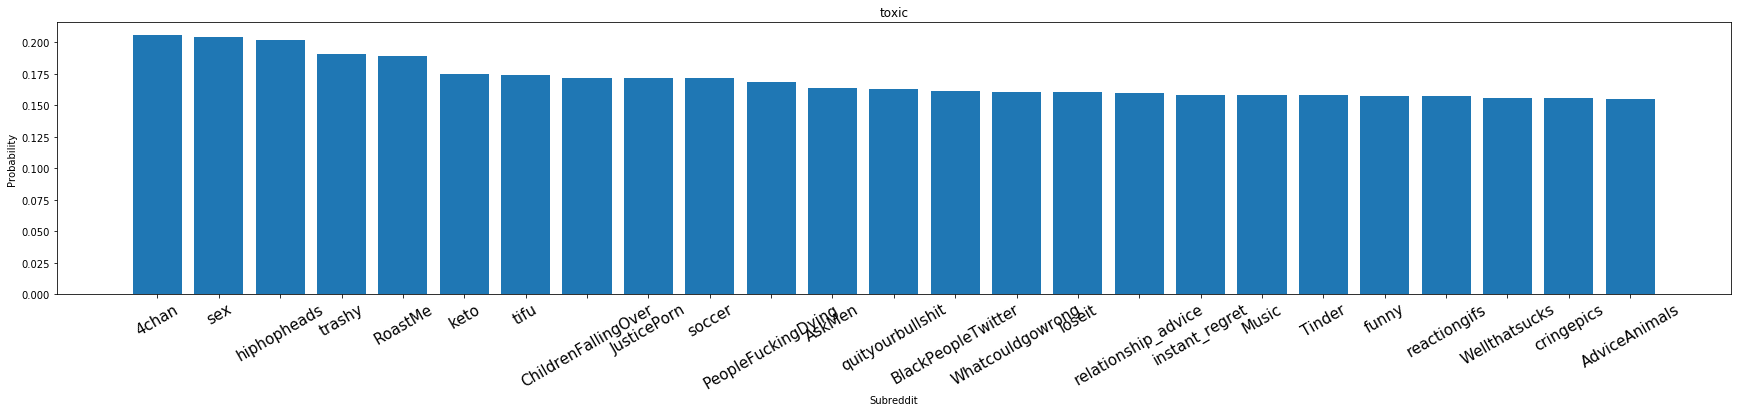

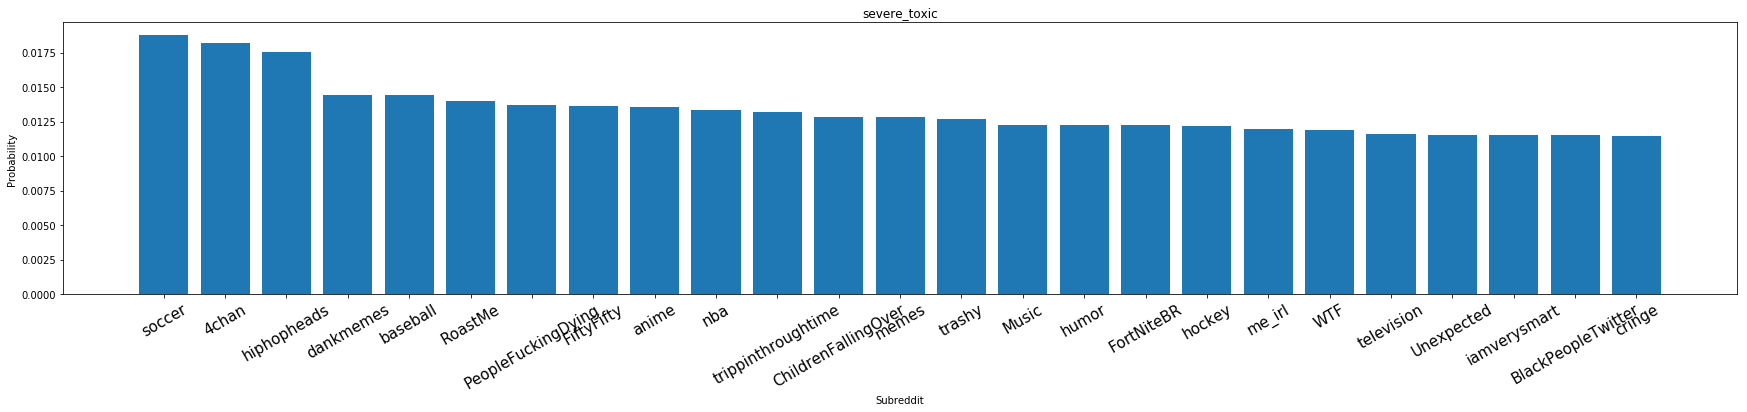

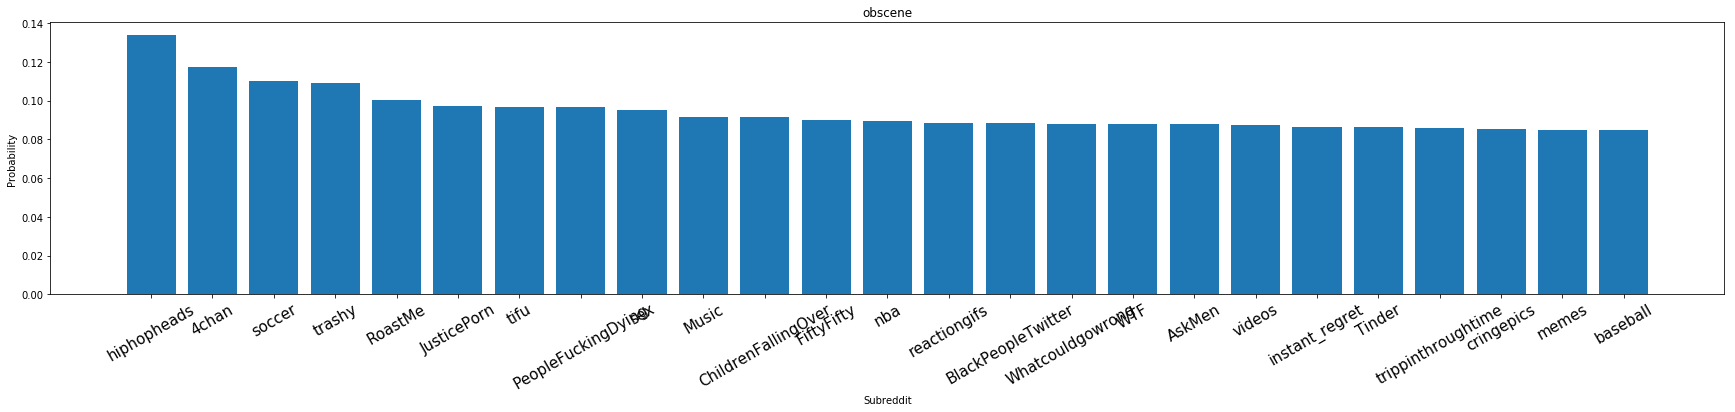

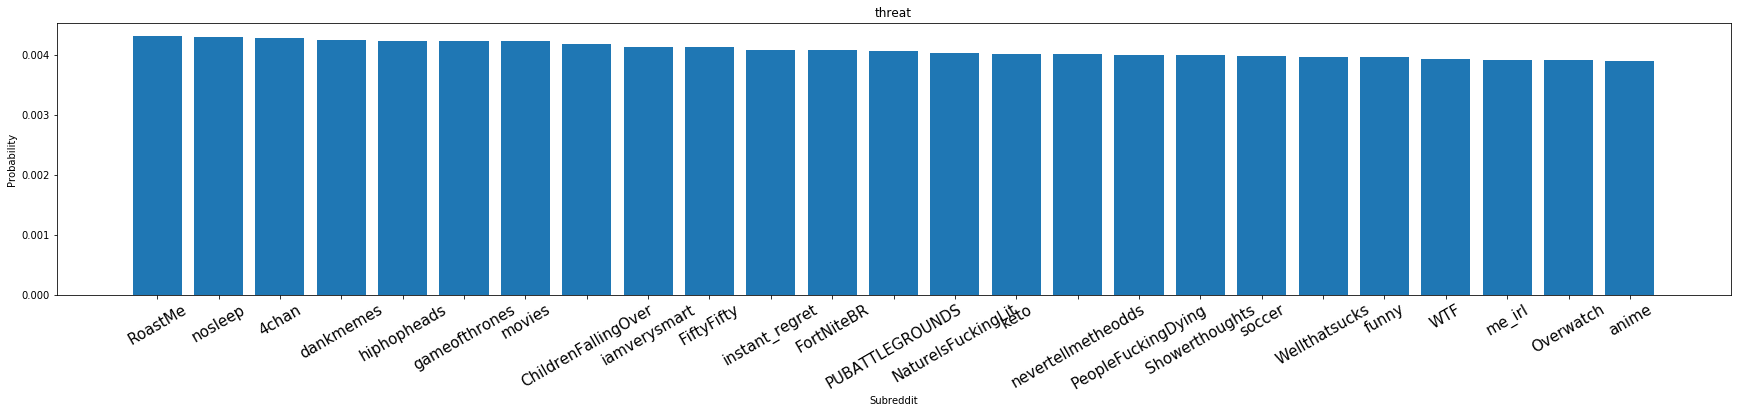

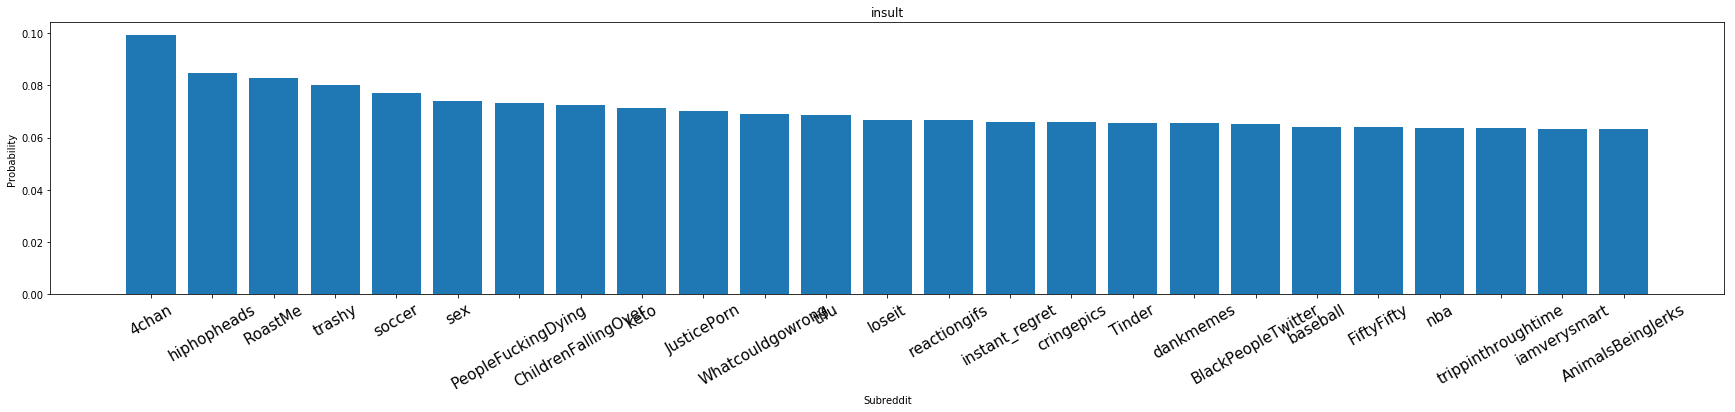

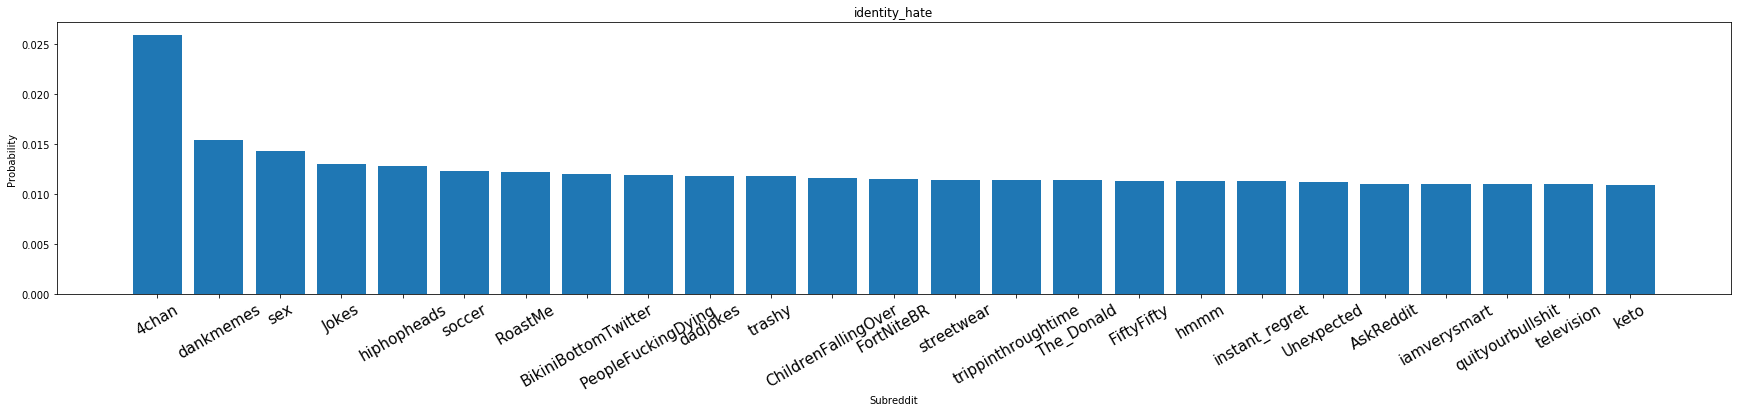

In [16]:
for i in range(6):
    plot_bar_x(i)

In [17]:
avg = []
for sub in subs:
    coms = df[df.subreddit == sub]
    tox = 0 #sum of toxic scores
    tx = 0  #count of toxic comments
    tn = 0
    non_tox = 0
    for row in coms.itertuples():
        max_val = max(row.toxic,row.severe_toxic,row.obscene,row.threat,row.identity_hate)
        if max_val>=0.5:
            tx+=1
            tox+=row.score
        else:
            tn+=1
            non_tox+=row.score
    if tx == 0:
        avg.append([sub, 0,non_tox/tn])
    elif tn == 0:
        avg.append([sub, tox/tx, 0])
    else:
        avg.append([sub, tox/tx, non_tox/tn])

In [18]:
avg

[['funny', 226.95348837209303, 190.02084446819882],
 ['AskReddit', 1234.6190476190477, 2822.4485488126647],
 ['todayilearned', 107.525, 202.29791666666668],
 ['worldnews', 299.1326530612245, 244.760778128286],
 ['science', 15.0, 69.97134238310709],
 ['pics', 48.21052631578947, 215.39835306227482],
 ['gaming', 183.0752688172043, 153.25432616675405],
 ['IAmA', 579.4313725490196, 475.14930733709593],
 ['videos', 544.9741935483871, 492.06287262872627],
 ['movies', 61.911764705882355, 174.4383419689119],
 ['aww', 53.75409836065574, 146.66993295513151],
 ['Music', 90.72549019607843, 171.1683811586356],
 ['blog', 2.8666666666666667, 16.72222222222222],
 ['gifs', 73.61643835616438, 187.9231966787753],
 ['news', 196.70833333333334, 272.6890756302521],
 ['explainlikeimfive', 58.464285714285715, 109.8940329218107],
 ['askscience', 14.0, 67.59129564782391],
 ['EarthPorn', 0.4423076923076923, 8.33025166923472],
 ['books', 13.837837837837839, 37.04075394803871],
 ['television', 56.669642857142854, 9

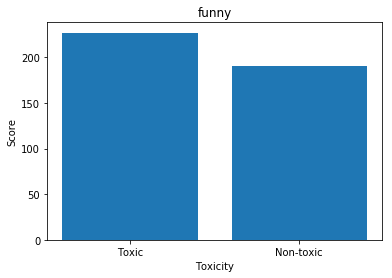

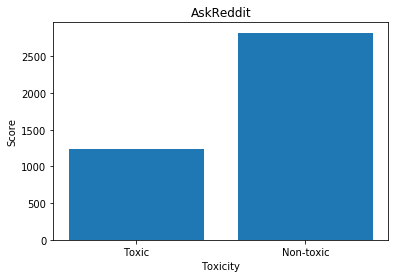

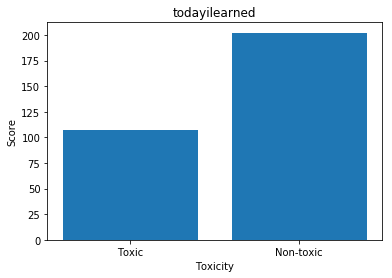

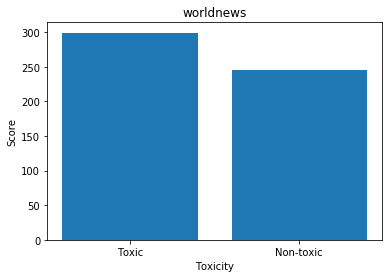

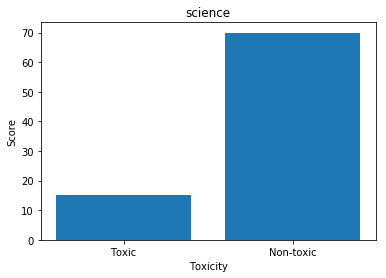

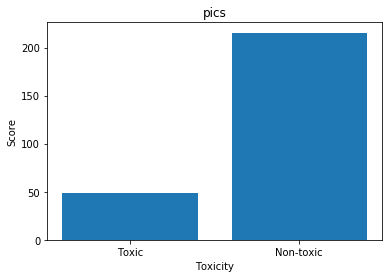

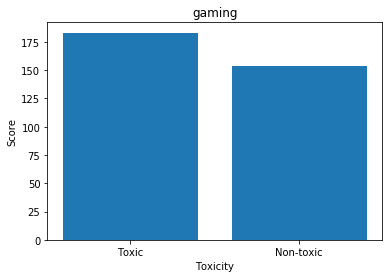

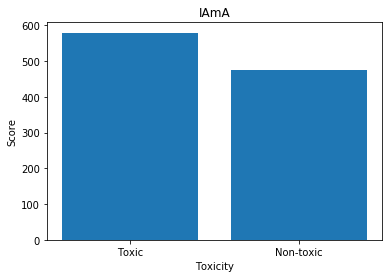

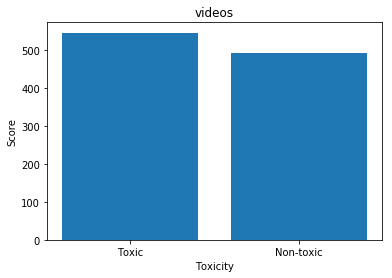

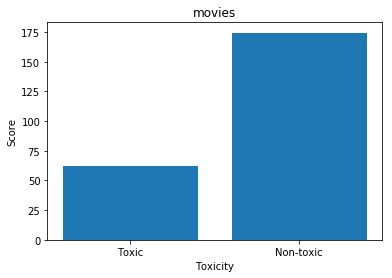

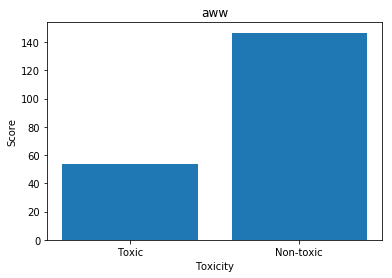

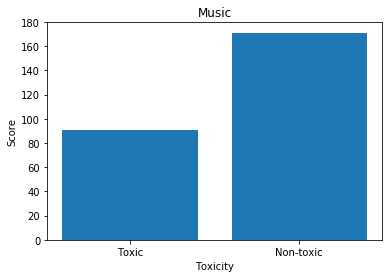

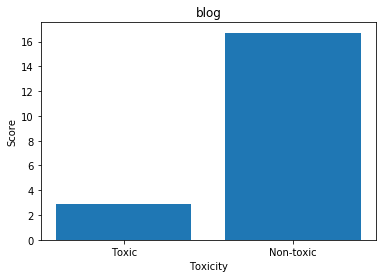

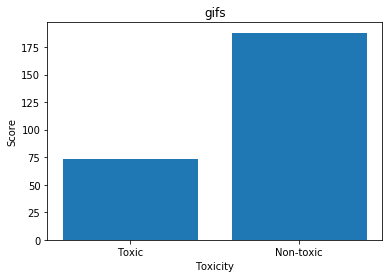

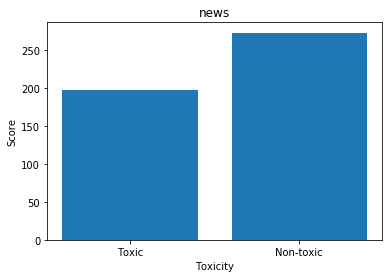

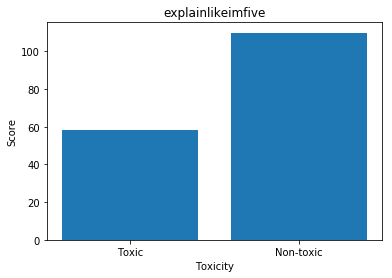

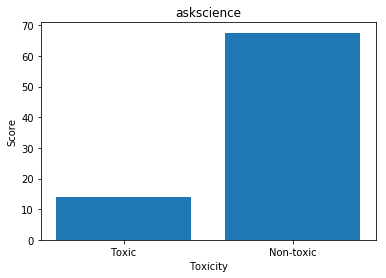

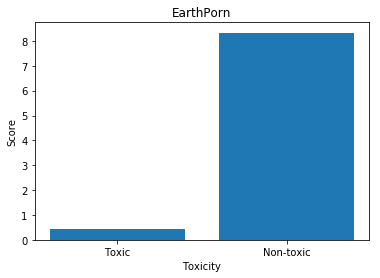

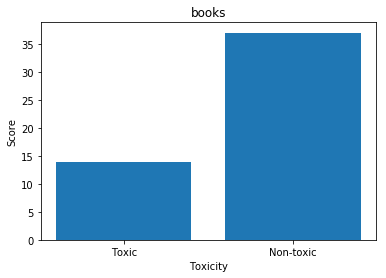

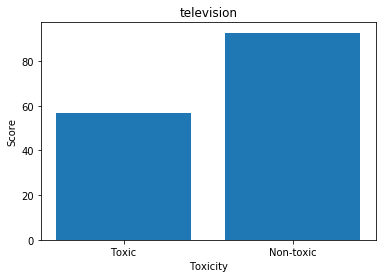

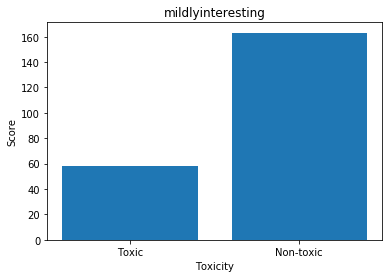

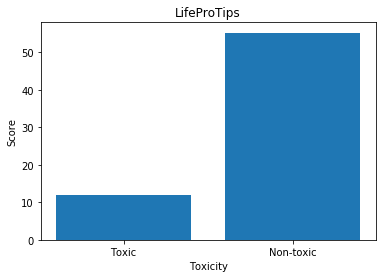

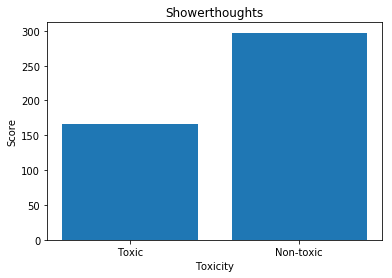

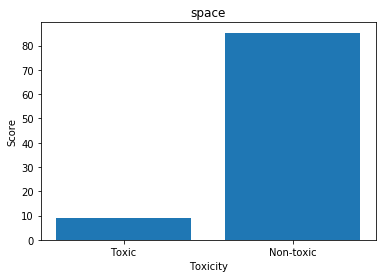

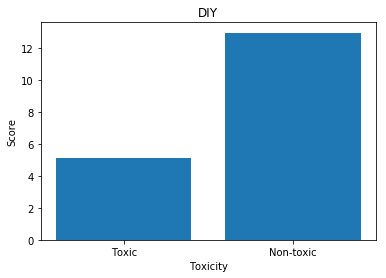

In [19]:
#fig = plt.figure()
for i in range(0,25):
    #plt.subplot(5,5,i+1)
    index = np.arange(2)
    plt.bar(index, [avg[i][1],avg[i][2]])
    plt.xlabel('Toxicity', fontsize=10)
    plt.ylabel('Score', fontsize=10)
    plt.xticks(index, ['Toxic','Non-toxic'], fontsize=10)
    plt.title(avg[i][0])
    plt.show()